In [1]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# ML models
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
ad = "https://raw.githubusercontent.com/simsekergun/photodetectors/main/MUTC1750designs.csv"
df = pd.read_csv(ad)

In [3]:
# let's take log10 of doping levels so that we deal with numbers in the similar ranges
df[df.columns[22:40]] =np.log10(df[df.columns[22:40]])
df.shape

(1755, 39)

In [4]:
df.head(3)

,phasenoise,phasenoise_15mA,current,IR_max,decay_time,t1,t2,t3,t4,t5,...,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17
0,-161.516,-170.938,0.001713,32002500000,184.775,20.7,121.5,6.0,33.5,96.7,...,18.809560,15.110590,14.963316,15.107210,16.143015,15.408240,18.748188,18.170262,18.928396,18.424882
1,-162.136,-171.316,0.001812,28499800000,161.603,76.7,79.0,85.4,12.0,77.6,...,18.598791,15.753583,16.503791,15.918030,17.227887,14.868644,17.181844,18.193125,18.721811,18.832509
2,-162.661,-172.271,0.001641,34642300000,174.001,86.5,94.5,7.0,16.6,111.4,...,18.836957,16.173186,15.372912,15.287802,16.491362,15.809560,18.100371,17.856124,19.404834,18.217484


In [5]:
df.describe()

,phasenoise,phasenoise_15mA,current,IR_max,decay_time,t1,t2,t3,t4,t5,...,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17
count,1755.000000,1755.000000,1755.000000,1.755000e+03,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,...,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000
mean,-170.904159,-177.668607,0.003658,5.396398e+10,62.732325,47.636524,106.206610,34.891556,43.307134,107.375670,...,17.712256,15.987027,16.378908,16.358700,17.047689,16.258266,17.985147,19.221367,19.013471,19.121494
std,3.845182,2.248727,0.002374,1.190861e+10,31.641076,24.608927,30.429793,23.385138,23.912232,29.172582,...,0.410801,0.442477,0.810166,0.812304,0.441059,0.833403,0.415166,0.545513,0.416695,0.555979
min,-178.621000,-183.613000,0.001459,2.849980e+10,22.224300,10.000000,36.000000,5.000000,6.000000,23.800000,...,16.505150,14.801404,14.801404,14.800029,15.947434,14.801404,16.808886,17.806858,17.800029,17.801404
25%,-173.773000,-179.189500,0.002360,4.545390e+10,37.899700,31.850000,90.300000,15.000000,15.000000,95.900000,...,17.482158,15.761552,15.868937,15.837904,16.781037,15.708421,17.797268,18.905256,18.872714,18.790637
50%,-170.027000,-177.815000,0.002539,5.236430e+10,53.955800,50.000000,100.000000,26.800000,47.000000,100.000000,...,17.698970,16.000000,16.110590,16.064458,17.093422,16.000000,18.000000,19.155336,19.000000,19.000000
75%,-168.358000,-176.220500,0.003013,6.194950e+10,75.028400,52.600000,120.350000,47.200000,60.400000,120.300000,...,17.884795,16.254063,16.993636,16.980648,17.455600,16.897624,18.118923,19.850603,19.167317,19.589391
max,-161.516000,-170.334000,0.009902,9.755770e+10,184.775000,178.000000,199.900000,100.000000,99.900000,199.800000,...,18.987666,17.193125,17.710963,17.687529,17.848805,17.923244,19.873902,20.193125,20.193125,20.195900


In [6]:
X = df.iloc[:,5:]
y = df.iloc[:,0]
print(X.shape,y.shape)

(1755, 34) (1755,)


### Linear Regression

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [8]:
reg = LinearRegression()         # Instantiate
reg.fit(X_train, y_train)        # Fit the train data

r2_train_score = reg.score(X_train, y_train)   # Calculating R^2 score for train

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('Coefficients of Linear Model:', reg.coef_, '\n')
print('Intercept:', reg.intercept_)

R^2 score for train dataset =  0.9406 

Coefficients of Linear Model: [ 5.03355149e-03  9.81427058e-04 -5.22804343e-04 -1.32939134e-03
  3.09388571e-03  4.20247510e-03  2.11619836e-03  1.27632371e-03
 -1.15778110e-02 -9.42134215e-04 -3.99785898e-05 -3.28512390e-04
  5.95287801e-04  2.54118306e-04 -7.47522924e-04  7.56612377e-03
 -2.44392842e-03  5.23633607e-01 -3.30348833e-01 -2.39877764e-01
 -8.09438182e-02  3.17012239e-02 -6.56533421e-01 -4.60954183e-01
  2.89954422e+00 -5.00590117e-01 -3.85229080e-01 -4.92024893e-01
 -3.29793317e-01 -9.29477681e-01 -1.06867230e-01 -3.88702457e-01
  4.41279153e-02 -3.93925930e-01] 

Intercept: -139.9048336814235


In [9]:
# Finding the predictions of the model for test dataset
y_pred = reg.predict(X_test)

In [10]:
# Evaluating the performance of the model on the test dataset

r2_test_score = reg.score(X_test, y_test)   # Calculating R^2 score for test

print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for test dataset =  0.9509 



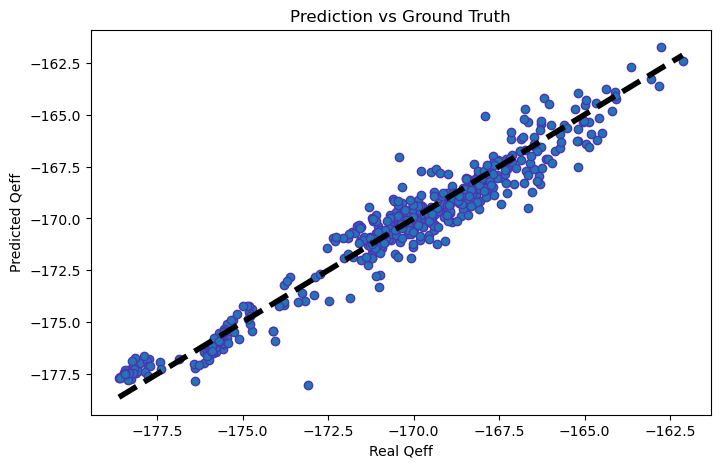

In [11]:
# Let's plot predictions vs ground truth for 'Qeff'

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(y_test, y_pred, edgecolors=(0.3, 0.2, 0.7))  # Scatter plot for predictions vs truth
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real Qeff')
ax.set_ylabel('Predicted Qeff')
plt.title('Prediction vs Ground Truth', fontdict=None, loc='center')
plt.show()

### Ridge Regularization

In [12]:
from sklearn.linear_model import Ridge   # Import 'Ridge' from sklearn
def do_ridge_reg(XX,yy, a):       
    ridge = Ridge(alpha=a, max_iter=10e5)  # Instantiate Ridge regression with penalty strength 'a'
    ridge.fit(XX, yy)                        # Fit the data
    
    r2_score = ridge.score(XX, yy)           # Calculate R^2 score
    coefs = ridge.coef_                    # Calculate the coefficients/weights of regression
    intercept = ridge.intercept_           # Calculate the intercept/bias term
    
    y_pred = ridge.predict(XX)              # Predict the target
    plt.scatter(yy, y_pred)      # Plot the prediction
    plt.gcf().set_size_inches(8, 5)
    plt.show()
    
    return r2_score, coefs, intercept      # Spit out R^2-score, weights, bias term

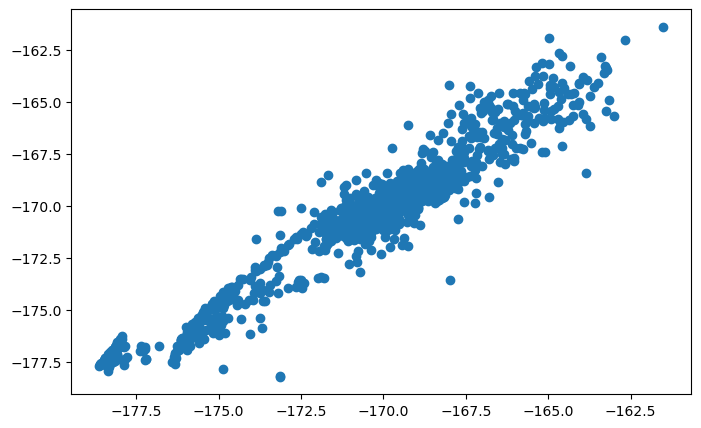

(0.9406168218618576,
 array([ 5.05577714e-03,  9.87146043e-04, -5.21430875e-04, -1.33327707e-03,
         3.10603413e-03,  4.19306047e-03,  2.12121702e-03,  1.28284165e-03,
        -1.15791281e-02, -9.44298158e-04, -3.22599262e-05, -2.93632323e-04,
         5.95794500e-04,  2.55143487e-04, -7.48949480e-04,  7.60112174e-03,
        -2.44032649e-03,  5.22665226e-01, -3.30920108e-01, -2.40706343e-01,
        -7.97770954e-02,  3.06291488e-02, -6.55461417e-01, -4.59778151e-01,
         2.88503557e+00, -4.97936668e-01, -3.85855242e-01, -4.92528061e-01,
        -3.29398911e-01, -9.28296568e-01, -1.06291985e-01, -3.89537422e-01,
         4.38704246e-02, -3.94218310e-01]),
 -139.68699291387517)

In [13]:
do_ridge_reg(X_train, y_train,1)  

### LASSO (without scaling)

In [14]:
from sklearn.linear_model import Lasso    # Import 'Lasso' from sklearn

In [15]:
def do_lasso_reg(XX,yy, a):       
    model = Lasso(alpha=a, max_iter=100000)
    model.fit(XX, yy)                        # Fit the data
    
    r2_score = model.score(XX, yy)           # Calculate R^2 score
    coefs = model.coef_                    # Calculate the coefficients/weights of regression
    intercept = model.intercept_           # Calculate the intercept/bias term
    
    y_pred = model.predict(XX)              # Predict the target
    plt.scatter(yy, y_pred)      # Plot the prediction
    plt.gcf().set_size_inches(8, 5)
    plt.show()
    
    return r2_score, coefs, intercept      # Spit out R^2-score, weights, bias term

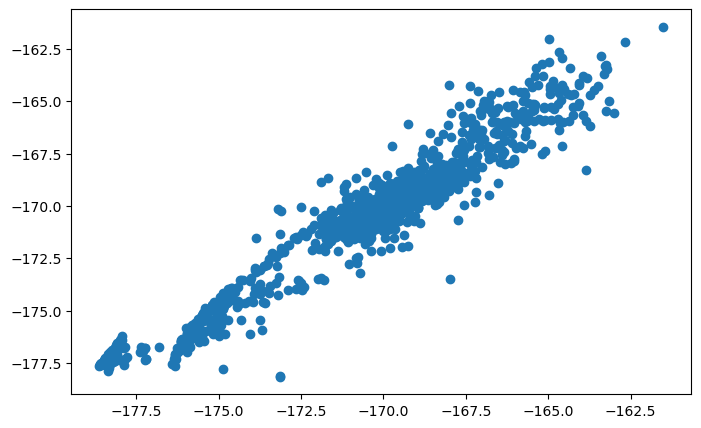

(0.9403517102870078,
 array([ 5.32038729e-03,  1.14710333e-03, -4.38165561e-04, -1.22927415e-03,
         3.07487768e-03,  4.12080077e-03,  2.31017838e-03,  1.22330178e-03,
        -1.14423529e-02, -5.90666905e-04,  8.27303873e-05,  2.20577881e-04,
         5.71829883e-04,  3.57387929e-04, -7.38528903e-04,  7.74712084e-03,
        -2.57673783e-03,  5.08772171e-01, -3.15861718e-01, -2.36888420e-01,
        -1.57134172e-02,  0.00000000e+00, -6.63114176e-01, -4.40421662e-01,
         2.83639711e+00, -4.46405882e-01, -3.94623460e-01, -4.98216757e-01,
        -2.57669094e-01, -9.39417974e-01, -4.58345340e-02, -3.79441148e-01,
         0.00000000e+00, -3.93293437e-01]),
 -141.89747873011493)

In [16]:
do_lasso_reg(X_train, y_train,0.01)  

### LASSO (with scaling)

In [17]:
Xmin = X.min(axis=0)
Xmax = X.max(axis=0)

X_scaled = (X - Xmin) / (Xmax - Xmin)

In [18]:
X_scaled.head()

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17
0,0.063690,0.521660,0.010526,0.292865,0.414205,0.512891,0.952208,0.229316,0.003432,0.992600,...,0.928256,0.129273,0.055648,0.106383,0.102863,0.194384,0.632722,0.152290,0.471509,0.260380
1,0.397024,0.262355,0.846316,0.063898,0.305682,0.775000,0.904746,0.213856,0.037594,0.459831,...,0.843354,0.398115,0.585101,0.387187,0.673437,0.021539,0.121682,0.161871,0.385184,0.430615
2,0.455357,0.356925,0.021053,0.112886,0.497727,0.381250,0.692156,0.391354,0.020595,0.735729,...,0.939292,0.573555,0.196424,0.168926,0.286071,0.322936,0.421363,0.020646,0.670598,0.173765
3,0.282738,0.362416,0.631579,0.887114,0.174432,0.846484,0.753461,0.331520,0.059333,0.554968,...,0.963731,0.456493,0.008256,0.003998,0.261186,0.049421,0.437301,0.163034,0.164262,0.101867
4,0.132143,0.903600,0.598947,0.905218,0.585227,0.922266,0.914964,0.285714,0.004740,0.394292,...,0.753843,0.101985,0.517636,0.605705,0.155469,0.010576,0.092833,0.406731,0.980362,0.170437


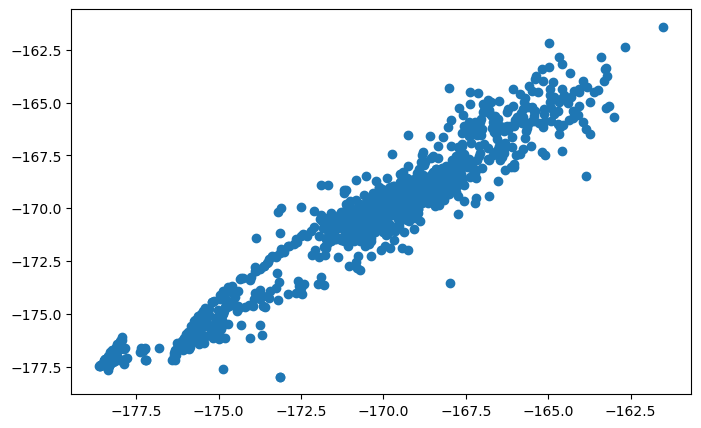

(0.9388005746989913,
 array([ 0.48185418,  0.06462858,  0.        , -0.        ,  0.33965394,
         0.90851055,  0.82411703,  0.36478117, -6.87836257,  0.        ,
         0.        ,  0.        ,  0.42629891,  0.        , -0.27436256,
         0.48654607, -0.56707101,  1.24739625, -0.9017971 , -0.62339217,
        -0.        ,  0.        , -1.99356029, -1.0365984 ,  6.93308377,
        -0.99890549, -1.14854545, -1.42465824, -0.58655319, -3.00483534,
        -0.        , -0.89363385,  0.        , -0.94768204]),
 -167.24236451127942)

In [19]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y, test_size=0.3, random_state=3)

do_lasso_reg(X_train2, y_train2,0.01) 

When we do LASSO with and without scaling, we obtain different results. We better discuss why this is happening in class